In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mplt_dates
from datetime import datetime
import numpy as np

In [2]:
df_group1 = pd.read_csv('tests_2010_2015.csv')
df_group1

,date,UUID,MeanThroughputMbps,MinRTT,LossRate,country_code,city,postal_code,latitude,longitude,ASNumber
0,2012-04-12,83.212.4.243795741.223.160.16050402012-04-12,0.198086,300,0.059289,SD,NaN,NaN,15.000,30.000,36972.0
1,2011-01-20,80.239.142.23345941197.31.206.4233862011-01-20,0.198086,430,0.024631,TN,NaN,NaN,34.000,9.000,2609.0
2,2012-06-11,80.239.168.21648129196.200.89.137584022012-06-11,0.198086,218,0.005780,ML,Bamako,NaN,12.650,-8.000,30985.0
3,2013-03-16,83.212.4.3750383105.228.226.202567162013-03-16,0.198086,278,0.015789,ZA,NaN,NaN,-29.000,24.000,37457.0
4,2013-07-08,83.212.4.103618441.230.225.61513362013-07-08,0.198086,133,0.051282,TN,NaN,NaN,34.000,9.000,37492.0
...,...,...,...,...,...,...,...,...,...,...,...
3035317,2013-03-09,83.212.4.1035680197.162.26.202523622013-03-09,0.198086,291,0.086538,EG,Cairo,NaN,30.050,31.250,24863.0
3035318,2012-01-04,83.212.4.2451839213.55.104.215396522012-01-04,0.198086,226,0.032710,ET,NaN,NaN,8.000,38.000,24757.0
3035319,2013-07-12,217.163.1.8844044196.27.102.241581042013-07-12,0.198086,208,0.043956,ZW,NaN,NaN,-20.000,30.000,30969.0
3035320,2011-10-12,83.212.4.243457641.133.17.147618462011-10-12,0.198086,377,0.005348,ZA,Alberton,NaN,-26.265,28.141,10474.0


In [3]:
df_group1.describe()

,MeanThroughputMbps,MinRTT,LossRate,postal_code,latitude,longitude,ASNumber
count,3.035322e+06,3.035322e+06,3.035322e+06,50875.000000,3.035322e+06,3.035322e+06,3.012420e+06
mean,9.988650e-01,3.159915e+06,5.937769e-02,3660.774742,1.048167e+01,1.673191e+01,2.402270e+04
std,4.106180e+00,1.164507e+08,7.296992e-02,2885.883112,2.489174e+01,1.685677e+01,1.893223e+04
min,2.000873e-03,0.000000e+00,0.000000e+00,1.000000,-3.725000e+01,-2.500000e+01,0.000000e+00
25%,1.414856e-01,1.200000e+02,8.165604e-03,1675.000000,-1.891700e+01,3.000000e+00,8.452000e+03
50%,3.748052e-01,2.000000e+02,3.025478e-02,2196.000000,2.700000e+01,1.700000e+01,2.525000e+04
75%,9.276123e-01,2.970000e+02,8.465608e-02,7100.000000,3.200000e+01,3.000000e+01,3.694700e+04
max,8.440967e+02,4.294967e+09,9.985246e-01,9908.000000,3.727400e+01,6.341700e+01,3.279400e+05


In [4]:
df_group1 ['MeanThroughputMbps'].count()

3035322

## Evolution of Download tests 2010 - 2015 : all countries in Africa

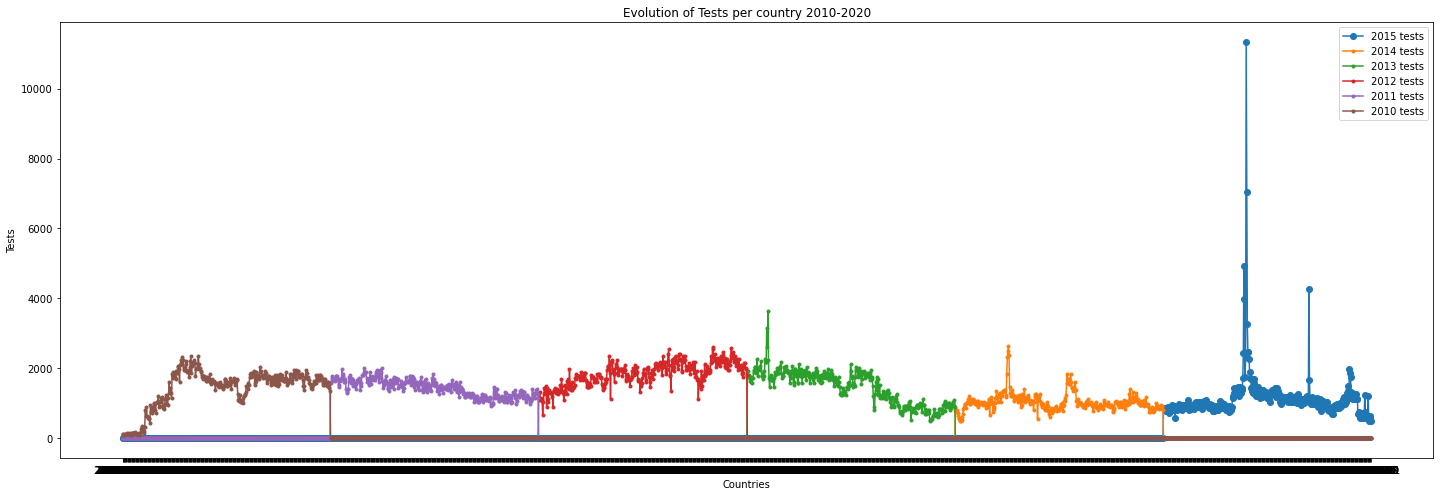

In [5]:
ASN_group = df_group1.groupby(['date'])
country_tests_2015 = ASN_group['date'].apply(lambda x : x.str.contains('2015').sum()) #sum counts all the trues
country_tests_2014 = ASN_group['date'].apply(lambda x : x.str.contains('2014').sum())
country_tests_2013 = ASN_group['date'].apply(lambda x : x.str.contains('2013').sum())
country_tests_2012 = ASN_group['date'].apply(lambda x : x.str.contains('2012').sum())
country_tests_2011 = ASN_group['date'].apply(lambda x : x.str.contains('2011').sum())
country_tests_2010 = ASN_group['date'].apply(lambda x : x.str.contains('2010').sum())

#country_tests_2020
fig, ax = plt.subplots(figsize=(20,7))
from matplotlib import pyplot as plt
plt.title("Evolution of Tests per country 2010-2020")
plt.xlabel("Countries")
plt.ylabel("Tests")
#plt.yscale("log")
plt.tight_layout() 

#plt.xkcd() #comics style : looking like handwritten
#plt.style.use('fivethirtyeight') #styling
#plt.grid(True)
plt.plot(country_tests_2015,marker='o',label="2015 tests") #k-- for black with dash lines : color= 'k', linestyle ='--'
plt.plot(country_tests_2014,marker ='.', label = '2014 tests') # b for blue : color ='b'
plt.plot(country_tests_2013,marker ='.', label = '2013 tests') 
plt.plot(country_tests_2012,marker ='.', label = '2012 tests')
plt.plot(country_tests_2011,marker ='.', label = '2011 tests')
plt.plot(country_tests_2010,marker ='.', label = '2010 tests')
plt.legend()

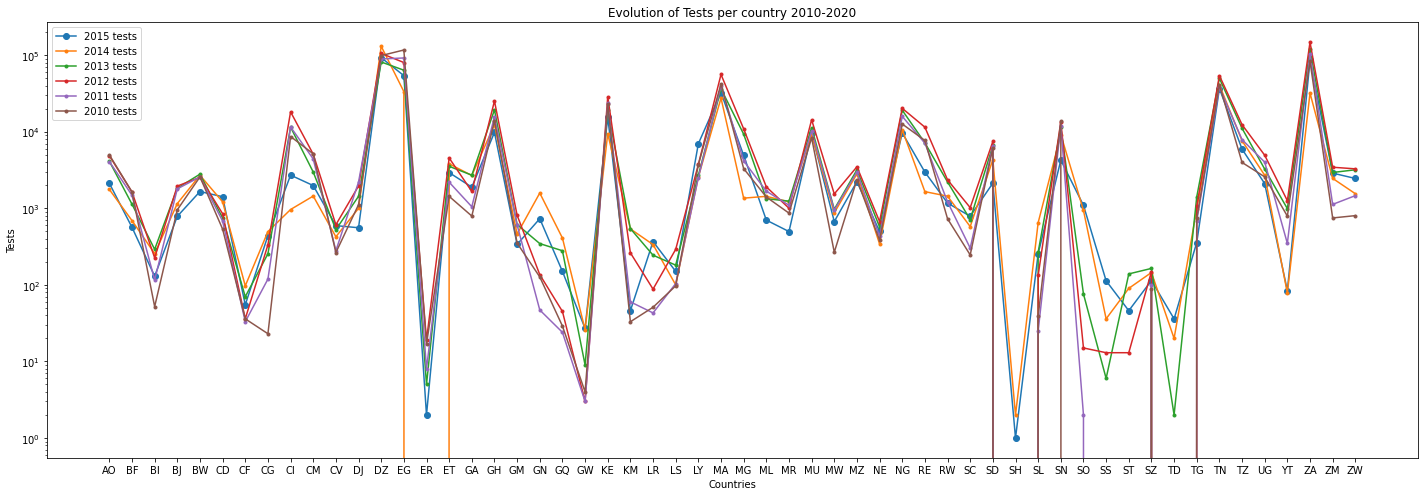

In [6]:
ASN_group = df_group1.groupby(['country_code'])
country_tests_2015 = ASN_group['date'].apply(lambda x : x.str.contains('2015').sum()) #sum counts all the trues
country_tests_2014 = ASN_group['date'].apply(lambda x : x.str.contains('2014').sum())
country_tests_2013 = ASN_group['date'].apply(lambda x : x.str.contains('2013').sum())
country_tests_2012 = ASN_group['date'].apply(lambda x : x.str.contains('2012').sum())
country_tests_2011 = ASN_group['date'].apply(lambda x : x.str.contains('2011').sum())
country_tests_2010 = ASN_group['date'].apply(lambda x : x.str.contains('2010').sum())

#country_tests_2020
fig, ax = plt.subplots(figsize=(20,7))
from matplotlib import pyplot as plt
plt.title("Evolution of Tests per country 2010-2020")
plt.xlabel("Countries")
plt.ylabel("Tests")
plt.yscale("log")
plt.tight_layout() 

#plt.xkcd() #comics style : looking like handwritten
#plt.style.use('fivethirtyeight') #styling
#plt.grid(True)
plt.plot(country_tests_2015,marker='o',label="2015 tests") #k-- for black with dash lines : color= 'k', linestyle ='--'
plt.plot(country_tests_2014,marker ='.', label = '2014 tests') # b for blue : color ='b'
plt.plot(country_tests_2013,marker ='.', label = '2013 tests') 
plt.plot(country_tests_2012,marker ='.', label = '2012 tests')
plt.plot(country_tests_2011,marker ='.', label = '2011 tests') 
plt.plot(country_tests_2010,marker ='.', label = '2010 tests') 
plt.legend()

## Download tests between 2010 and 2015

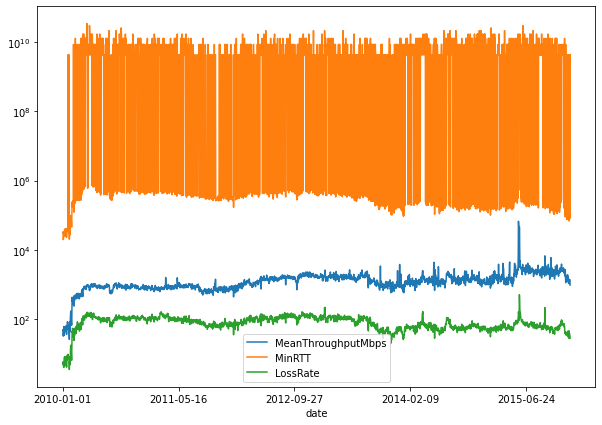

In [7]:
year_group = df_group1.groupby(['date']).sum().iloc[:,0:3].plot(kind ='line',figsize=(10,7))

plt.yscale("log")


In [9]:
grouped = df_group1.groupby(['date','country_code']) 
years = [2010,2011,2012,2013,2014,2015]
first_five =[]
filt_2010 = df_group1['date'].str.contains('2010')
filt_2011 = df_group1['date'].str.contains('2011')
filt_2012 = df_group1['date'].str.contains('2012')
filt_2013 = df_group1['date'].str.contains('2013')
filt_2014 = df_group1['date'].str.contains('2014')
filt_2015 = df_group1['date'].str.contains('2015')

thoughputCounts_2010 = df_group1.loc[filt_2010]['MeanThroughputMbps'].sum() # count Meanthroughputs tests in 2010 : 522737
minRTT_2010 = df_group1.loc[filt_2010]['MinRTT'].sum() ##count MinRTT tests in 2010 : 522737 ?
LossRate_2010 = df_group1.loc[filt_2010]['LossRate'].sum() #522737


#test types Counts_2011
#thoughputCounts_2011 =df_group1.loc[filt_2011]['MinRTT'].count() #523319
#minRTT_2011 = df_group1.loc[filt_2011]['MinRTT'].count() #523319
LossRate_2011 = df_group1.loc[filt_2011][['MinRTT','LossRate','MeanThroughputMbps']].sum()# 523319

LossRate_2012 = df_group1.loc[filt_2012][['MinRTT','LossRate','MeanThroughputMbps']].sum()# 669097
LossRate_2013 = df_group1.loc[filt_2013][['MinRTT','LossRate','MeanThroughputMbps']].sum()# 531212
LossRate_2014 = df_group1.loc[filt_2014][['MinRTT','LossRate','MeanThroughputMbps']].sum()# 375478
LossRate_2015 = df_group1.loc[filt_2015][['MinRTT','LossRate','MeanThroughputMbps']].sum()# 413479

first_five.append(LossRate_2010)
first_five.append(LossRate_2011)
first_five.append(LossRate_2012)
first_five.append(LossRate_2013)
first_five.append(LossRate_2014)
first_five.append(LossRate_2015)

first_five

[32681.304706392886,
 MinRTT                1.237092e+12
 LossRate              3.276375e+04
 MeanThroughputMbps    2.870620e+05
 dtype: float64,
 MinRTT                1.417496e+12
 LossRate              3.880616e+04
 MeanThroughputMbps    5.138859e+05
 dtype: float64,
 MinRTT                1.271425e+12
 LossRate              3.078495e+04
 MeanThroughputMbps    5.221898e+05
 dtype: float64,
 MinRTT                2.108896e+12
 LossRate              2.184740e+04
 MeanThroughputMbps    4.936486e+05
 dtype: float64,
 MinRTT                1.834018e+12
 LossRate              2.334685e+04
 MeanThroughputMbps    9.542947e+05
 dtype: float64]

In [ ]:
country_tests_2010

In [10]:
#country counts again
country_tests = df_group1['country_code'].value_counts()
country_tests

DZ    597953
ZA    570912
EG    439770
TN    260337
MA    234174
KE    119428
GH     96311
NG     88039
SN     64060
MU     62962
CI     53509
TZ     48876
RE     38021
MG     33937
SD     33276
LY     22182
AO     21919
CM     21043
UG     19557
ET     18424
MZ     17053
BW     14817
ZM     13581
ZW     12727
GA     10778
RW      9116
BJ      8469
ML      8453
DJ      8262
BF      7131
MR      5915
CD      5444
MW      5269
TG      5244
SC      3645
YT      3546
GM      3180
GN      2969
NE      2894
CV      2699
SO      2124
CG      1666
KM      1482
SL      1370
LR      1130
BI      1071
GQ       936
LS       923
SZ       761
CF       327
ST       288
SS       168
GW        72
TD        58
ER        51
SH         3
Name: country_code, dtype: int64

In [11]:
df_group1['ASNumber'].value_counts()

36947.0    545540
2609.0     222932
8452.0     206881
6713.0     173939
10474.0    136335
            ...  
37501.0         1
3686.0          1
62023.0         1
37513.0         1
37415.0         1
Name: ASNumber, Length: 949, dtype: int64

In [12]:
ASN_group = df_group1.groupby(['country_code'])
filt = df_group1['country_code']=='ZA' 
ASN_group['ASNumber'].value_counts().head(50)
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))

country_code  ASNumber
AO            36907.0     5717
              11259.0     5324
              37081.0     3162
              37119.0     2706
              37155.0     1522
              33763.0      623
              8657.0       515
              32717.0      385
              36881.0      369
              17400.0      351
              36917.0      288
              1.0          246
              37011.0      213
              34444.0      140
              198381.0      84
              36896.0       48
              36898.0       47
              37533.0       43
              37645.0       42
              37468.0       16
              198394.0      14
              37603.0       10
              37318.0        9
              35017.0        3
              37384.0        2
              39116.0        2
              13207.0        1
              37593.0        1
              43350.0        1
              57731.0        1
              327806.0       1
BF            25

In [13]:
ASN_group2 = df_group1.groupby(['country_code','ASNumber'])
years = [2010,2011,2012,2013,2014,2015]
za_2010 =df_group1[(df_group1['date'].str.contains('2010')) & (df_group1.country_code =='ZA')]
za_2011 =df_group1[(df_group1['date'].str.contains('2011')) & (df_group1.country_code =='ZA')]
za_2012 =df_group1[(df_group1['date'].str.contains('2012')) & (df_group1.country_code =='ZA')]
za_2013 =df_group1[(df_group1['date'].str.contains('2013')) & (df_group1.country_code =='ZA')]
za_2014 =df_group1[(df_group1['date'].str.contains('2014')) & (df_group1.country_code =='ZA')]
za_2015 =df_group1[(df_group1['date'].str.contains('2015')) & (df_group1.country_code =='ZA')]
# filt_2011 = df_group1['date'].str.contains('2011')
# #fig, ax = plt.subplots(figsize=(20,7))
# df_group1.loc[filt]['ASNumber'].value_counts().head(50)
# df_group1.loc[filt]['country_code'].value_counts().head(50)

# ASNs = df_group1.loc[filt]['ASNumber'].value_counts().rename_axis('ASNumber').reset_index(name='counts')
# asns_2011 = df_group1.loc[filt_2011]['ASNumber'].value_counts().rename_axis('ASNumber').reset_index(name='counts')
# # asns_2011.plot()

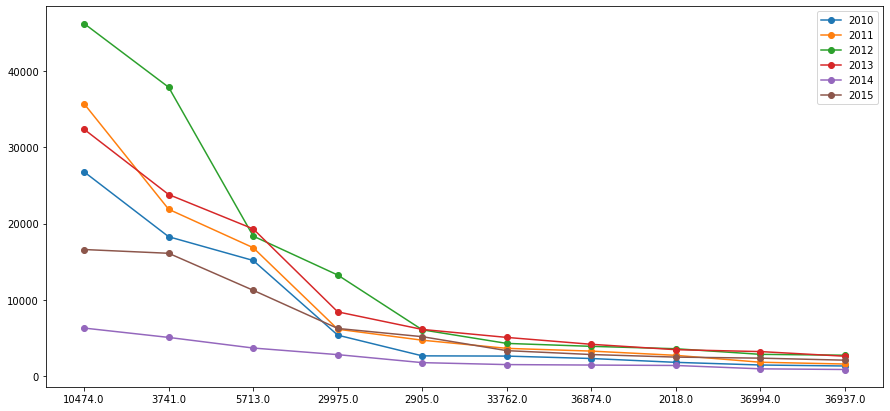

In [14]:
za_asn_2010 = za_2010['ASNumber'].value_counts().rename_axis('ASNumber').reset_index(name='counts')
za_asn_2011 = za_2011['ASNumber'].value_counts().rename_axis('ASNumber').reset_index(name='counts')
za_asn_2012 = za_2012['ASNumber'].value_counts().rename_axis('ASNumber').reset_index(name='counts')
za_asn_2013 = za_2013['ASNumber'].value_counts().rename_axis('ASNumber').reset_index(name='counts')
za_asn_2014 = za_2014['ASNumber'].value_counts().rename_axis('ASNumber').reset_index(name='counts')
za_asn_2015 = za_2015['ASNumber'].value_counts().rename_axis('ASNumber').reset_index(name='counts')

za_asn_2010.ASNumber = za_asn_2010.ASNumber.astype(str)
za_asn_2011.ASNumber = za_asn_2010.ASNumber.astype(str)
za_asn_2012.ASNumber = za_asn_2010.ASNumber.astype(str)
za_asn_2013.ASNumber = za_asn_2010.ASNumber.astype(str)
za_asn_2014.ASNumber = za_asn_2010.ASNumber.astype(str)
za_asn_2015.ASNumber = za_asn_2010.ASNumber.astype(str)

top10_za_asn = za_asn_2010.iloc[0:10]['ASNumber']
counts_top10_za_asn =za_asn_2010.iloc[0:10]['counts']

top11_za_asn = za_asn_2011.iloc[0:10]['ASNumber']
counts_top11_za_asn =za_asn_2011.iloc[0:10]['counts']

top12_za_asn = za_asn_2012.iloc[0:10]['ASNumber']
counts_top12_za_asn =za_asn_2012.iloc[0:10]['counts']

top13_za_asn = za_asn_2013.iloc[0:10]['ASNumber']
counts_top13_za_asn =za_asn_2013.iloc[0:10]['counts']

top14_za_asn = za_asn_2014.iloc[0:10]['ASNumber']
counts_top14_za_asn =za_asn_2014.iloc[0:10]['counts']

top15_za_asn = za_asn_2015.iloc[0:10]['ASNumber']
counts_top15_za_asn =za_asn_2015.iloc[0:10]['counts']


za_asn_top_counts =pd.concat([top10_za_asn, counts_top10_za_asn], axis=1)
za_asn_top_counts2011 =pd.concat([top11_za_asn, counts_top11_za_asn], axis=1)
za_asn_top_counts2012 =pd.concat([top12_za_asn, counts_top12_za_asn], axis=1)
za_asn_top_counts2013 =pd.concat([top13_za_asn, counts_top13_za_asn], axis=1)
za_asn_top_counts2014 =pd.concat([top14_za_asn, counts_top14_za_asn], axis=1)
za_asn_top_counts2015 =pd.concat([top15_za_asn, counts_top15_za_asn], axis=1)

fig, ax = plt.subplots(figsize=(15,7))
plt.plot(za_asn_top_counts['ASNumber'],za_asn_top_counts['counts'],marker='o',label ='2010')
plt.plot(za_asn_top_counts2011['ASNumber'],za_asn_top_counts2011['counts'],marker='o',label ='2011')
plt.plot(za_asn_top_counts2012['ASNumber'],za_asn_top_counts2012['counts'],marker='o',label ='2012')
plt.plot(za_asn_top_counts2013['ASNumber'],za_asn_top_counts2013['counts'],marker='o',label ='2013')
plt.plot(za_asn_top_counts2014['ASNumber'],za_asn_top_counts2014['counts'],marker='o',label ='2014')
plt.plot(za_asn_top_counts2015['ASNumber'],za_asn_top_counts2015['counts'],marker='o',label ='2015')
plt.legend()

In [15]:
m_lab_ccs = ['ZA','KE','NG','MG']
df_agg = df_group1.groupby(['date'])['country_code'].value_counts().reset_index(name='counts')
df_agg

,date,country_code,counts
0,2010-01-01,EG,38
1,2010-01-01,DZ,13
2,2010-01-01,ZA,12
3,2010-01-01,CM,11
4,2010-01-01,TN,7
...,...,...,...
83219,2015-12-31,BF,1
83220,2015-12-31,GM,1
83221,2015-12-31,GN,1
83222,2015-12-31,ML,1


NameError: name 'matplotlib' is not defined

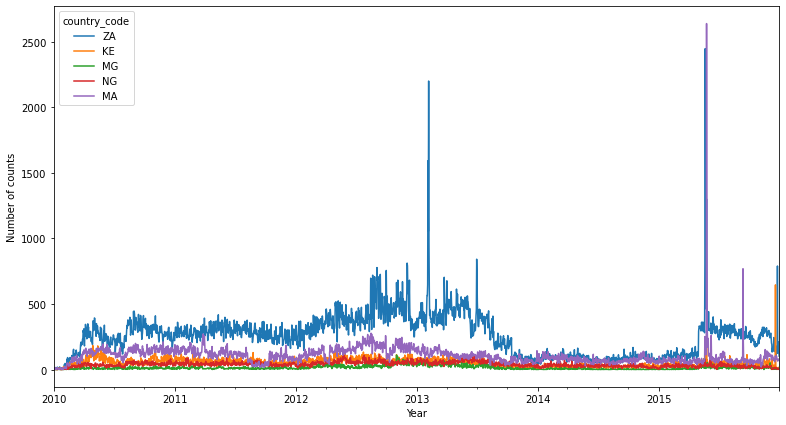

In [21]:
df_agg.date = pd.to_datetime(df_agg['date'], format='%Y-%m-%d')
tests_za =df_agg[(df_agg.country_code =='ZA')]
tests_ke =df_agg[(df_agg.country_code =='KE')]
tests_mg =df_agg[(df_agg.country_code =='MG')]
tests_ng =df_agg[(df_agg.country_code =='NG')]
tests_ma =df_agg[(df_agg.country_code =='MA')]
#tests_za.set_index('date',inplace =True)
fig, ax = plt.subplots(figsize=(13,7))


#ax.plot(tests_za.index, tests_za['counts'])

styles = ['b','g','y', 'r','m']

# use unstack()
#tests_za.groupby(['date','country_code']).sum()['counts'].unstack()

tests_za.groupby(['date','country_code']).sum()['counts'].unstack().plot(ax=ax, label ="ZA")
tests_ke.groupby(['date','country_code']).sum()['counts'].unstack().plot(ax=ax, label ="KE")
tests_mg.groupby(['date','country_code']).sum()['counts'].unstack().plot(ax=ax, label ="MG")
tests_ng.groupby(['date','country_code']).sum()['counts'].unstack().plot(ax=ax, label ="NG")
tests_ma.groupby(['date','country_code']).sum()['counts'].unstack().plot(ax=ax, label ="MA")

ax.set_xlabel('Year')
ax.set_ylabel('Number of counts')

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
#ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
ax.tick_params(axis="x", which="both", length=4)
plt.legend()

In [ ]:
df_agg

In [ ]:
Za_df = df_group1[(df_group1['date'].str.contains('2010')) & (df_group1.country_code =='ZA')].reset_index()


In [ ]:
za_year = Za_df.groupby(['date'])